Laboratorio: Comparación del rendimiento de modelos Random Forest y XGBoost

Objetivos

Después de completar este laboratorio, podrás:

Usar scikit-learn para implementar modelos de regresión Random Forest y XGBoost

Comparar el rendimiento de ambos modelos

Introducción

En este laboratorio crearás y medirás el rendimiento relativo de los modelos de regresión Random Forest y XGBoost para predecir precios de casas utilizando el California Housing Dataset.
Por rendimiento nos referimos tanto a velocidad como a exactitud.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import time

In [9]:
data = fetch_california_housing()
X, y = data.data, data.target

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Ejercicio 1: ¿Cuántas observaciones y características tiene el conjunto de datos?

In [10]:
N_observations, N_features = X.shape
print('Number of Observations: ' + str(N_observations))
print('Number of Features: ' + str(N_features))

Number of Observations: 20640
Number of Features: 8


Este es un conjunto de datos de tamaño moderado utilizado para este análisis.
Ten en cuenta que solo estás usando un único conjunto de datos, por lo que debes considerar que la comparación puede cambiar cuando aumenta la escala.

Inicializar modelos

En este paso defines el número de estimadores base —o árboles individuales— que se usarán en cada modelo, y luego inicializas los modelos de regresión Random Forest y regresión XGBoost.

Utilizarás solo los parámetros predeterminados para realizar las comparaciones de rendimiento. Como parte de la comparación, también mediremos los tiempos de entrenamiento de ambos modelos.

In [11]:
# Initialize models
n_estimators=100
rf = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
xgb = XGBRegressor(n_estimators=n_estimators, random_state=42)

In [12]:
# Fit models
# Measure training time for Random Forest
start_time_rf = time.time()
rf.fit(X_train, y_train)
end_time_rf = time.time()
rf_train_time = end_time_rf - start_time_rf

# Measure training time for XGBoost
start_time_xgb = time.time()
xgb.fit(X_train, y_train)
end_time_xgb = time.time()
xgb_train_time = end_time_xgb - start_time_xgb

### Ejercicio 2. Usa los modelos ajustados para hacer predicciones en el conjunto de prueba

Además, mide el tiempo que tarda cada modelo en hacer sus predicciones usando la función time.time(), registrando los tiempos antes y después de cada predicción.

In [13]:
start_time_rf = time.time()
y_pred_rf = rf.predict(X_test)
end_time_rf = time.time()
rf_pred_time = end_time_rf - start_time_rf

# Measure prediciton time for XGBoost
start_time_xgb = time.time()
y_pred_xgb = xgb.predict(X_test)
end_time_xgb = time.time()
xgb_pred_time = end_time_xgb - start_time_xgb

### Ejercicio 3: Calcula los valores de MSE y R² para ambos modelos

In [16]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_rf = r2_score(y_test, y_pred_rf)
r2_xgb = r2_score(y_test, y_pred_xgb)

### Ejercicio 4: Imprime los valores de MSE y R² para ambos modelos

In [17]:
print(f'Random Forest:  MSE = {mse_rf:.4f}, R^2 = {r2_rf:.4f}')
print(f'      XGBoost:  MSE = {mse_xgb:.4f}, R^2 = {r2_xgb:.4f}')

Random Forest:  MSE = 0.2556, R^2 = 0.8050
      XGBoost:  MSE = 0.2226, R^2 = 0.8301


Se puede observar a partir de los valores de MSE y R² que XGBoost es mejor que Random Forest, pero las diferencias no son abrumadoras.

### Ejercicio 5: Imprime los tiempos de ejecución de cada modelo

In [18]:
print(f'Random Forest:  Training Time = {rf_train_time:.3f} seconds, Testing time = {rf_pred_time:.3f} seconds')
print(f'      XGBoost:  Training Time = {xgb_train_time:.3f} seconds, Testing time = {xgb_pred_time:.3f} seconds')

Random Forest:  Training Time = 11.663 seconds, Testing time = 0.104 seconds
      XGBoost:  Training Time = 0.141 seconds, Testing time = 0.003 seconds


Lo que resulta muy impresionante es la diferencia en el tiempo de cómputo entre XGBoost y Random Forest tanto para el entrenamiento como para la prueba.

A continuación, se desea generar gráficas de dispersión entre los valores predichos y los valores reales para ambos modelos, de modo que se pueda evaluar visualmente qué tan bien se desempeña cada modelo.
También trazaremos líneas a una desviación estándar de los datos de prueba por encima y por debajo de la línea ideal, es decir, la línea que representa el regresor perfecto, donde todas las predicciones serían correctas.

### Ejercicio 6: Calcula la desviación estándar de los datos de prueba

In [19]:
# Standard deviation of y_test
std_y = np.std(y_test)

In [20]:
start_time_rf = time.time()
y_pred_rf = rf.predict(X_test)
end_time_rf = time.time()
rf_pred_time = end_time_rf - start_time_rf

# Measure prediciton time for XGBoost
start_time_xgb = time.time()
y_pred_xgb = xgb.predict(X_test)
end_time_xgb = time.time()
xgb_pred_time = end_time_xgb - start_time_xgb

mse_rf = mean_squared_error(y_test, y_pred_rf)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_rf = r2_score(y_test, y_pred_rf)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f'Random Forest:  MSE = {mse_rf:.4f}, R^2 = {r2_rf:.4f}')
print(f'      XGBoost:  MSE = {mse_xgb:.4f}, R^2 = {r2_xgb:.4f}')
print(f'Random Forest:  Training Time = {rf_train_time:.3f} seconds, Testing time = {rf_pred_time:.3f} seconds')
print(f'      XGBoost:  Training Time = {xgb_train_time:.3f} seconds, Testing time = {xgb_pred_time:.3f} seconds')
std_y = np.std(y_test)

Random Forest:  MSE = 0.2556, R^2 = 0.8050
      XGBoost:  MSE = 0.2226, R^2 = 0.8301
Random Forest:  Training Time = 11.663 seconds, Testing time = 0.229 seconds
      XGBoost:  Training Time = 0.141 seconds, Testing time = 0.004 seconds


### Visualización de los resultados

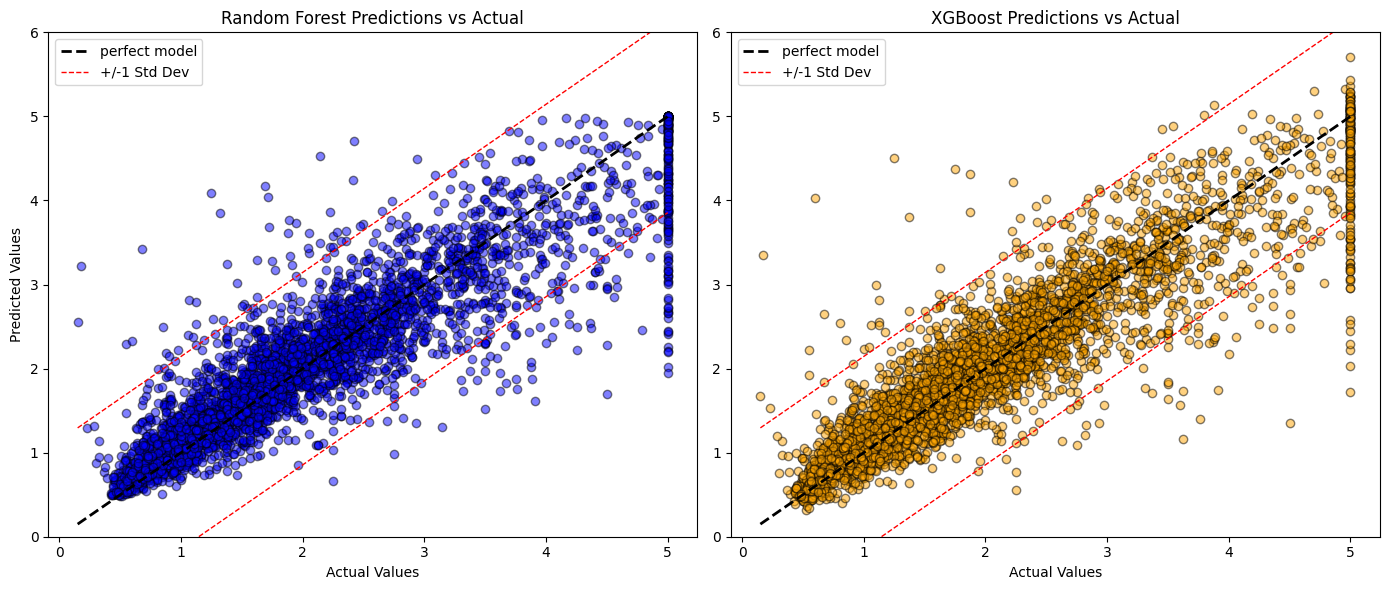

In [21]:
plt.figure(figsize=(14, 6))

# Random Forest plot
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_rf, alpha=0.5, color="blue",ec='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2,label="perfect model")
plt.plot([y_test.min(), y_test.max()], [y_test.min() + std_y, y_test.max() + std_y], 'r--', lw=1, label="+/-1 Std Dev")
plt.plot([y_test.min(), y_test.max()], [y_test.min() - std_y, y_test.max() - std_y], 'r--', lw=1, )
plt.ylim(0,6)
plt.title("Random Forest Predictions vs Actual")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()


# XGBoost plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_xgb, alpha=0.5, color="orange",ec='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2,label="perfect model")
plt.plot([y_test.min(), y_test.max()], [y_test.min() + std_y, y_test.max() + std_y], 'r--', lw=1, label="+/-1 Std Dev")
plt.plot([y_test.min(), y_test.max()], [y_test.min() - std_y, y_test.max() - std_y], 'r--', lw=1, )
plt.ylim(0,6)
plt.title("XGBoost Predictions vs Actual")
plt.xlabel("Actual Values")
plt.legend()
plt.tight_layout()
plt.show()

Ambos modelos se desempeñaron muy bien. La mayoría de sus predicciones se encuentran dentro de una desviación estándar del objetivo.
Curiosamente, Random Forest “respeta” el límite superior (el valor máximo) presente en la variable objetivo al mantenerse dentro de sus límites, mientras que XGBoost tiende a “exceder” o sobrepasar este límite.

Fin del cuadernillo